# <span style="color:red">======================Ayad======================</span>

# <span style="color:blue">1- Data</span>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

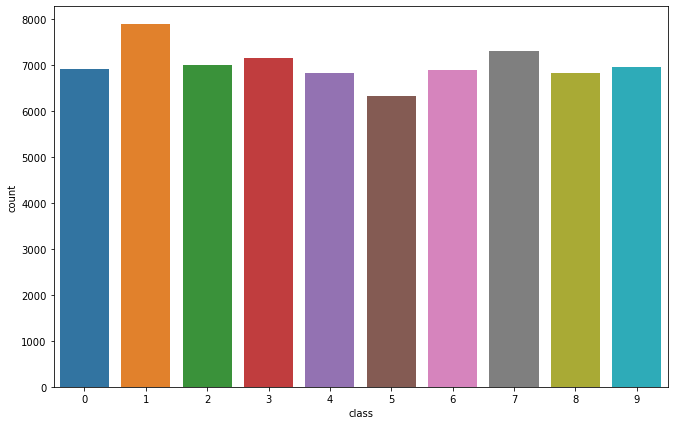

In [25]:
plt.figure(figsize=(11, 7))

sns.countplot(y)
plt.show()

 ### <span style="color:green">Is there any missing values???</span>

In [30]:
X.isnull().sum().values.sum()

0

# <span style="color:blue">2- Fitting the RFC model on the original dataset</span>

#### Because we will fit this more than once, might as well make a function

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
def fit_random_forest_classifier(X, y, cm = False):
    '''
    INPUT: names are pretty self explanatory
    OUTPUT: none - prints the confusion matrix and accuracy
    '''
    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    if cm:
        mat = confusion_matrix(y_test, y_preds)
        print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    
    acc = accuracy_score(y_test, y_preds)
    return acc

In [52]:
fit_random_forest_classifier(X, y)

0.9658441558441558

# <span style="color:blue">3- principal component analysis (PCA)</span>

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [45]:
def do_pca(data, n_components):
    '''
    INPUT: data - the data you would like to transform
           n_components - int - the number of principal components to create
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [43]:
pca, X_pca = do_pca(X, 2)

In [44]:
fit_random_forest_classifier(X_pca, y)

0.3219480519480519


**See if you can find a reduced number of features that provides better separation to make predictions. Say you want to get separation that allows for accuracy of more than 90%, how many principal components are needed to obtain this level of accuracy? Were you able to substantially reduce the number of features needed in your final model?**

In [65]:
for comp in range(2, 100):
    pca, X_pca = do_pca(X, comp)
    acc = fit_random_forest_classifier(X_pca, y)
    if acc > .90:
        num_comps = pca.n_components
        break
        
print("With only {} components, a random forest acheived an accuracy of {}.".format(num_comps, acc))

With only 10 components, a random forest acheived an accuracy of 0.9037662337662338.


**One of the main features to consider is something called the explained_variance_ratio. I created what's known as a scree_plot to show the explained_variance_ratio for each of the 15 components.**

In [61]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT: None
    '''
    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

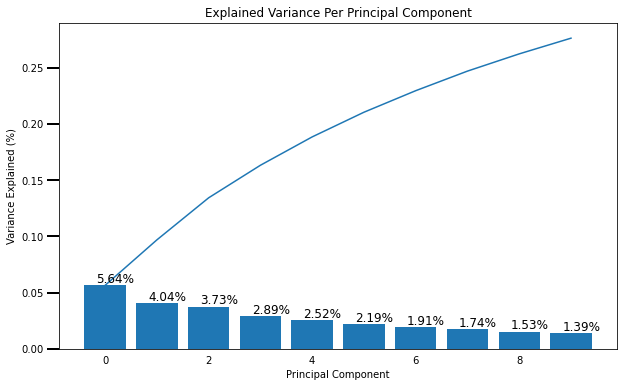

In [62]:
scree_plot(pca)

Each of the bars represents the amount of variability explained by each component. So you can see the first component explains 6.13% of the variability in the image data. The second explains 4.29% of the variability and so on. Often the number of components is chosen based on the total amount of variability explained by the components. You can see that by using 15 components, we capture almost 35% of the total variability in the images.

In [63]:
pca.components_.shape

(10, 784)

You have had an opportunity to look at the two major parts of PCA:

`I.` The amount of **variance explained by each component**.  This is called an **eigenvalue**.

`II.` The principal components themselves, each component is a vector of weights.  In this case, the principal components help us understand which pixels of the image are most helpful in identifying the difference between digits. **Principal components** are also known as **eigenvectors**.

# <span style="color:red">======================Ayad======================</span>